<a href="https://colab.research.google.com/github/hmezer/codex-metricus/blob/main/econometrics/ols_vs_gls.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

# Part b: comparing the relative efficiency of OLS vs GLS

# Setup
n = 10
x = np.arange(1, n + 1)
X = np.column_stack((np.ones(n), x))  # Design matrix with intercept and slope

# We will test for these δ values
delta_values = [0, 0.5, 1, 1.5, 2, 2.5]

# Arbitrary sigma^2 (since it cancels out in the efficiency ratio)
sigma2 = 1

# Store efficiencies for each delta
efficiencies = {}

for delta in delta_values:
    # Build variance vector: σ_i^2 = σ^2 * x_i^δ
    variances = sigma2 * x ** delta
    V = np.diag(variances)
    V_inv = np.diag(1 / variances)

    # OLS variance-covariance: σ^2 * (X'X)^(-1)
    XtX_inv = np.linalg.inv(X.T @ X)
    cov_ols = sigma2 * XtX_inv

    # GLS variance-covariance: (X'V^{-1}X)^(-1)
    XtVinvX_inv = np.linalg.inv(X.T @ V_inv @ X)
    cov_gls = XtVinvX_inv

    # Compute the efficiency: tr(Cov_GLS) / tr(Cov_OLS)
    eff = np.trace(cov_gls) / np.trace(cov_ols)
    efficiencies[delta] = eff

efficiencies


{0: np.float64(1.0),
 0.5: np.float64(1.45826953765901),
 1: np.float64(1.980429510678157),
 1.5: np.float64(2.6040449352152195),
 2: np.float64(3.486566301405887),
 2.5: np.float64(4.9879134353396575)}

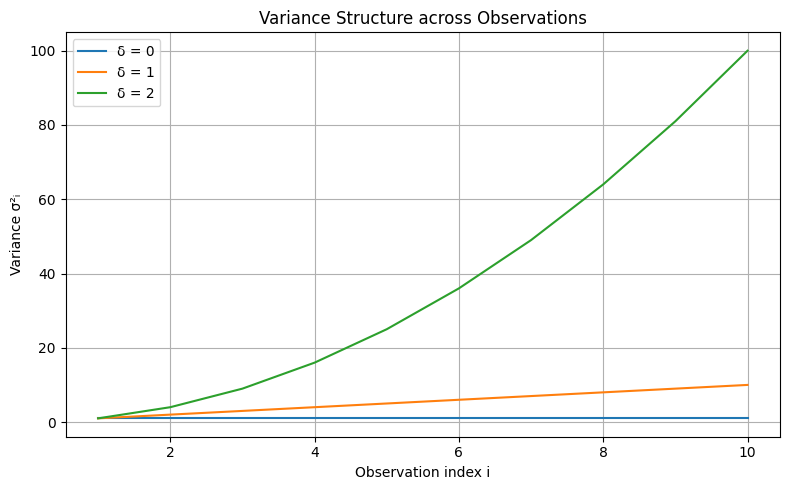

In [5]:
# Variance profiles for different δ
x = np.arange(1, 11)
sigma2 = 1
delta_to_plot = [0, 1, 2]

plt.figure(figsize=(8, 5))
for delta in delta_to_plot:
    variances = sigma2 * x ** delta
    plt.plot(x, variances, label=f'δ = {delta}')

plt.title('Variance Structure across Observations')
plt.xlabel('Observation index i')
plt.ylabel('Variance σ²ᵢ')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


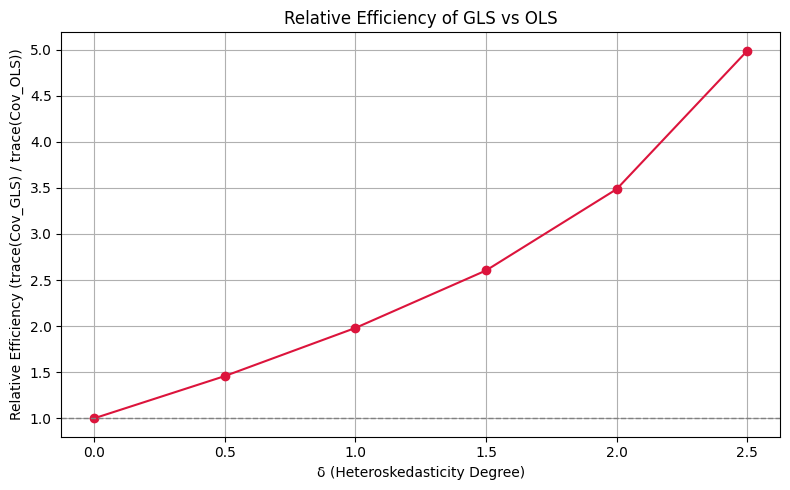

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs from previous analysis
delta_values = [0, 0.5, 1, 1.5, 2, 2.5]
efficiencies = [1.0, 1.45826953765901, 1.980429510678157, 2.6040449352152195, 3.486566301405887, 4.9879134353396575]

# Plot 1: Efficiency vs Delta
plt.figure(figsize=(8, 5))
plt.plot(delta_values, efficiencies, marker='o', color='crimson')
plt.axhline(1, color='gray', linestyle='--', linewidth=1)
plt.title('Relative Efficiency of GLS vs OLS')
plt.xlabel('δ (Heteroskedasticity Degree)')
plt.ylabel('Relative Efficiency (trace(Cov_GLS) / trace(Cov_OLS))')
plt.grid(True)
plt.tight_layout()
plt.show()
